# Mall Customer Clustering with K-Means Clustering

## Data Understanding


- **CustomerID:** Ini adalah identifikasi unik untuk setiap pelanggan. Digunakan untuk mengidentifikasi dan membedakan antara satu pelanggan dengan pelanggan lainnya.

- **Genre:** Merupakan jenis kelamin atau jenis kelamin pelanggan, yang dapat berupa 'Male' (Laki-laki) atau 'Female' (Perempuan).

- **Age:** Ini adalah kolom yang berisi informasi tentang usia pelanggan. Biasanya diukur dalam tahun dan memberikan informasi tentang seberapa muda atau tua pelanggan tersebut.

- **Annual Income:** Menunjukkan pendapatan tahunan pelanggan dalam ribu dolar (k$). Informasi ini membantu untuk memahami seberapa besar keuangan pelanggan dan dapat berpengaruh pada perilaku belanja mereka.

- **Spending Score (1-100):** Merupakan skor atau penilaian yang menggambarkan seberapa sering atau seberapa banyak pelanggan tersebut menghabiskan uang dalam skala 1 hingga 100. Nilai yang lebih tinggi mungkin menunjukkan perilaku belanja yang lebih aktif atau besar.

## Daftar Pustaka

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
baskom = df.shape
print('Jumlah Baris : ',baskom[0])
print('Jumlah Kolom : ',baskom[1])

Jumlah Baris :  200
Jumlah Kolom :  5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Prepocessing Data

In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(columns=['CustomerID'])

In [ ]:
gender_mapping = {'Male':1,'Female':0}
df['Genre'] = df['Genre'].map(gender_mapping)

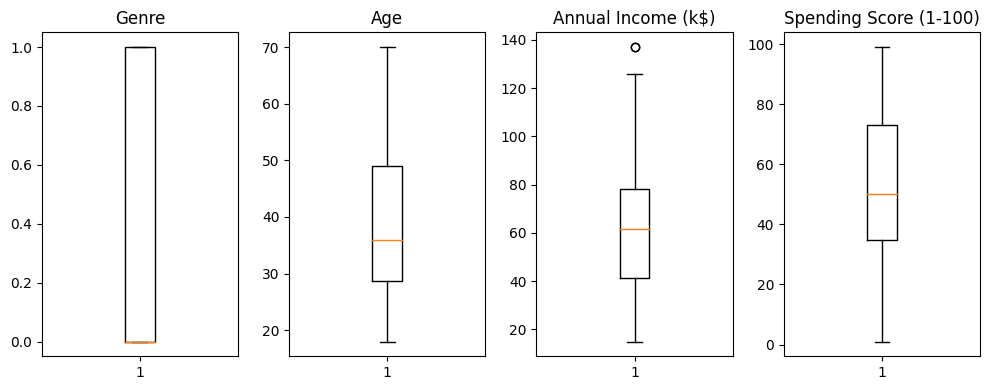

In [ ]:
columns = df.columns
fig, axes = plt.subplots(nrows =1, ncols =4, figsize= (10, 4))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)


for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Modeling

In [ ]:
# menghilangkan kolom customer id dan gender
X = df.drop(['Genre'], axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

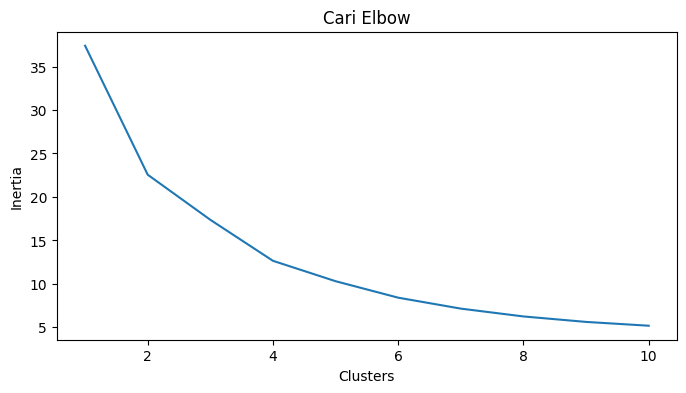

In [ ]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


In [ ]:
kmeans = KMeans(n_clusters=5)
# fitting input data
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [ ]:
df['Cluster'] = labels
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2


In [ ]:
centroids

array([[0.28605769, 0.58278689, 0.82168367],
       [0.72214854, 0.27444884, 0.41608023],
       [0.17425432, 0.30311141, 0.40857976],
       [0.14464883, 0.09265859, 0.79148181],
       [0.5       , 0.61584699, 0.17278912]])

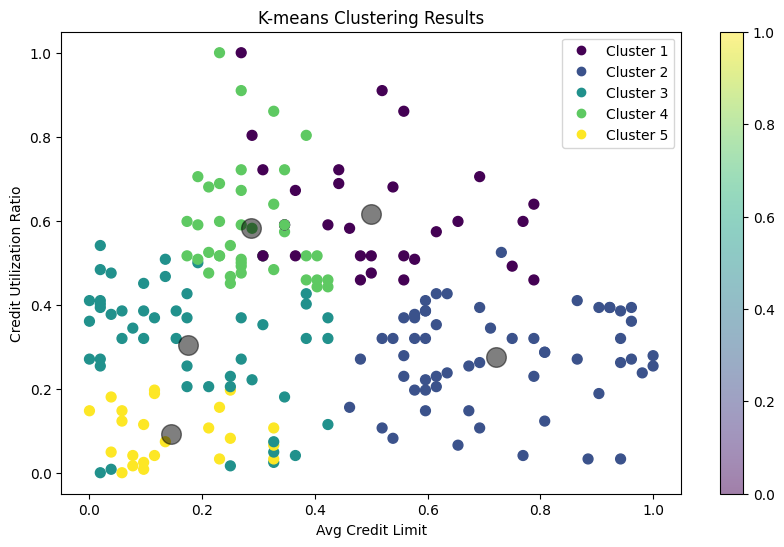

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5'])

plt.xlabel('Avg Credit Limit')
plt.ylabel('Credit Utilization Ratio')
plt.title('K-means Clustering Results')
plt.colorbar()
plt.show()

In [ ]:
count_cluster = df['Cluster'].value_counts()
count_cluster

1    58
2    49
0    40
4    30
3    23
Name: Cluster, dtype: int64

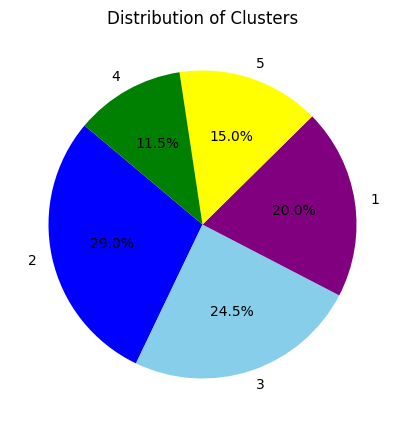

In [ ]:
# Data untuk Pie Chart
sizes = count_cluster.values
labels = count_cluster.index + 1
colors = ['blue','skyblue','Purple','yellow','green']

# Plotting Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Clusters')
plt.show()